In [2]:
### load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import wntr
import wntr_utils
from decimal import Decimal

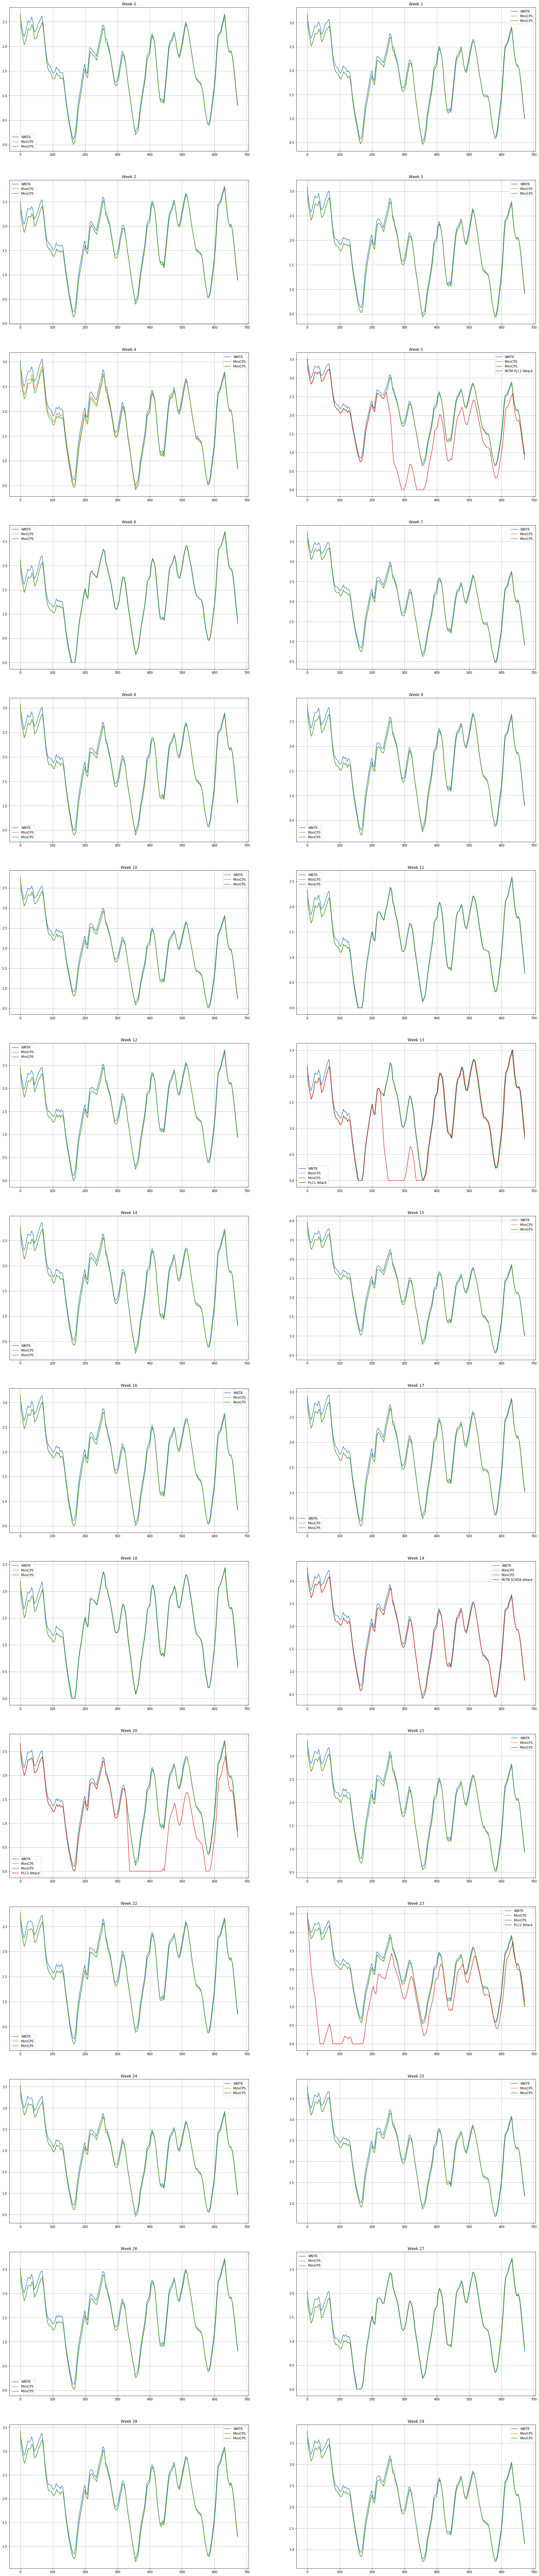

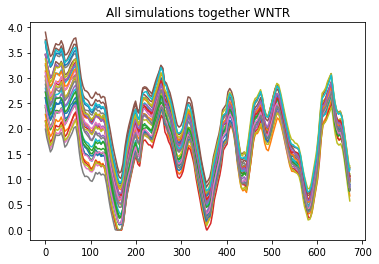

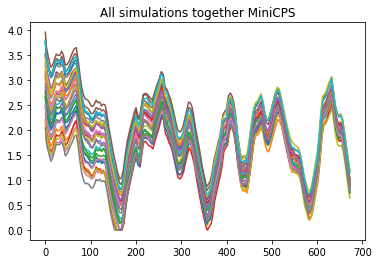

In [4]:
nr = 15 
nc = 2

f, ax = plt.subplots(nr,nc,figsize=(30,150))
week_index = 0

for row_index in range(0,15):
    for col_index in range(0,2):    
        week_wntr_results = pd.read_csv('wntr_only_results/minitown_wntr_week_' + str(week_index) + '.csv')
        week_minicps_results = pd.read_csv('data/week_' + str(week_index) + '/physical_process.csv')
        automatic_week_minicps_results = pd.read_csv('automatic_data/week_' + str(week_index) + '/physical_process.csv')
        
        ax[row_index][col_index].plot(week_wntr_results["TANK_LEVEL"], label='WNTR')
        ax[row_index][col_index].plot(week_minicps_results["TANK_LEVEL"], label='MiniCPS')
        ax[row_index][col_index].plot(automatic_week_minicps_results["TANK_LEVEL"], label='MiniCPS')
        ax[row_index][col_index].set_title("Week " + str(week_index))
        ax[row_index][col_index].legend()
        ax[row_index][col_index].grid()
        
        if week_index == 5:
            mitm_plc2 = pd.read_csv('data/week_5_mitm_plc2/physical_process.csv')
            ax[row_index][col_index].plot(mitm_plc2["TANK_LEVEL"], label='MiTM PLC2 Attack')
            ax[row_index][col_index].legend()
        
        if week_index == 13:
            plc1_attack = pd.read_csv('data/week_13_plc1_attack/physical_process.csv')
            ax[row_index][col_index].plot(plc1_attack["TANK_LEVEL"], label='PLC1 Attack')
            ax[row_index][col_index].legend()

        if week_index == 19:
            scada_attack = pd.read_csv('data/week_19_mitm_scada/physical_process.csv')
            ax[row_index][col_index].plot(scada_attack["TANK_LEVEL"], label='MiTM SCADA Attack')        
            ax[row_index][col_index].legend()
                    
        if week_index == 20:
            plc2_attack = pd.read_csv('data/week_20_plc2_attack/physical_process.csv')
            ax[row_index][col_index].plot(plc2_attack["TANK_LEVEL"], label='PLC2 Attack')        
            ax[row_index][col_index].legend()
            
        if week_index == 23:
            plc2_attack = pd.read_csv('data/week_23_dos_plc2/physical_process.csv')
            ax[row_index][col_index].plot(plc2_attack["TANK_LEVEL"], label='PLC2 Attack')        
            ax[row_index][col_index].legend()

        week_index += 1
        
f, ax_2 = plt.subplots(1,1)
for week_index in range(0,30):
    week_wntr_results = pd.read_csv('wntr_only_results/minitown_wntr_week_' + str(week_index) + '.csv')
    ax_2.plot(week_wntr_results["TANK_LEVEL"])
    ax_2.set_title("All simulations together WNTR")
    
f, ax_2 = plt.subplots(1,1)
for week_index in range(0,30):
    week_minicps_results = pd.read_csv('data/week_' + str(week_index) + '/physical_process.csv')
    ax_2.plot(week_minicps_results["TANK_LEVEL"])
    ax_2.set_title("All simulations together MiniCPS")    

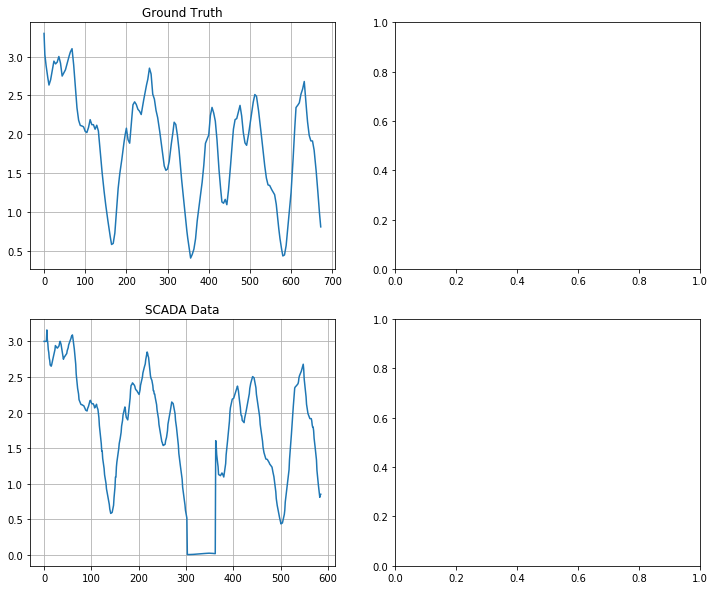

In [15]:
week_minicps_results = pd.read_csv('data/week_19_mitm_scada/physical_process.csv')
attack_results = pd.read_csv('data/week_19_mitm_scada/scada_saved_tank_levels_received.csv')
f_3, ax_3 = plt.subplots(2,2,figsize=(12,10))
ax_3[0][0].plot(week_minicps_results["TANK_LEVEL"])
ax_3[0][0].set_title("Ground Truth")
ax_3[0][0].grid()

ax_3[1][0].plot(attack_results["TANK_LEVEL"])
ax_3[1][0].set_title("SCADA Data")
ax_3[1][0].grid()
